<a href="https://colab.research.google.com/github/MiguelJ125/AnalisisExploratorioDatos/blob/main/AED_Grupo_D_Copia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AED** - 
El siguiente estudio tratara de determinar el uso que se dio a la tajeta SUBE por periodo de tiempo, provincia/municipio.
Se procedera a dividir el set de datos de acuerdo a la provincia de Buenos Aires, CABA y el resto de las provincias para obtener resultados mas representativos.
Para esto se trabajará con el archivo sube2020.csv en el cual están registradas todas las
transacciones realizadas durante el año 2020.

Las **columnas** y el **tipo de dato** que tenemos en el dataframe son:

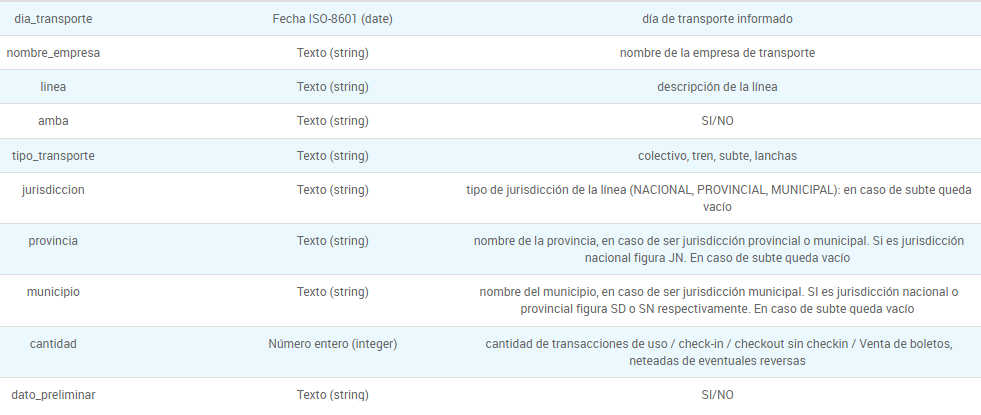

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

sube = pd.read_csv('E:\Mis Carpetas\Documentos\Data Science\sube2020.csv')

#usar mucho grupby para ver relaciones entre variables
#dividir fechas en temporadas


In [46]:
sube.head(10)

DIA_TRANSPORTE                                     NOMBRE_EMPRESA  \
0     2020-01-01                                 EMPRESA BATAN S.A.   
1     2020-01-01               COMPAÑIA  DE TRANSPORTE VECINAL S.A.   
2     2020-01-01           EMPRESA DE TRANSPORTE PERALTA RAMOS SACI   
3     2020-01-01  AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...   
4     2020-01-01                                      EL URBANO SRL   
5     2020-01-01                                      EL URBANO SRL   
6     2020-01-01                     TRANSPORTES LINEA 123 S.A.C.I.   
7     2020-01-01           TRANPORTES VEINTIDOS DE SETIEMBRE S.A.C.   
8     2020-01-01                     GENERAL TOMAS GUIDO S.A.C.I.F.   
9     2020-01-01                                      LINEA 10 S.A.   

              LINEA AMBA TIPO_TRANSPORTE JURISDICCION     PROVINCIA  \
0  BS_AS_LINEA 715M   NO       COLECTIVO    MUNICIPAL  BUENOS AIRES   
1   BS_AS_LINEA_326   SI       COLECTIVO   PROVINCIAL  BUENOS AIRES   
2   BS_AS_LINEA_512   NO       COLECTIVO    MUNICIPAL  BUENOS AIRES   
3   BS_AS_LINEA_514   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
4   BS_AS_LINEA_522   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
5   BS_AS_LINEA_527   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
6    BS_ASLINEA_123   SI       COLECTIVO     NACIONAL            JN   
7    BSAS_LINEA_002   SI       COLECTIVO     NACIONAL            JN   
8    BSAS_LINEA_009   SI       COLECTIVO     NACIONAL            JN   
9    BSAS_LINEA_010   SI       COLECTIVO     NACIONAL            JN   

            MUNICIPIO  CANTIDAD DATO_PRELIMINAR  
0  GENERAL PUEYRREDON      2154              NO  
1                  SN      1492              NO  
2  GENERAL PUEYRREDON      1889              NO  
3     ALMIRANTE BROWN      4669              NO  
4               LANUS       187              NO  
5               LANUS       543              NO  
6                  SD      1927              NO  
7                  SD      6408              NO  
8                  SD      5879              NO  
9                  SD      4531              NO

In [47]:
sube.shape

(356628, 10)

In [48]:
sube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356628 entries, 0 to 356627
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   356628 non-null  object
 1   NOMBRE_EMPRESA   356628 non-null  object
 2   LINEA            356628 non-null  object
 3   AMBA             356628 non-null  object
 4   TIPO_TRANSPORTE  356628 non-null  object
 5   JURISDICCION     354067 non-null  object
 6   PROVINCIA        354067 non-null  object
 7   MUNICIPIO        354067 non-null  object
 8   CANTIDAD         356628 non-null  int64 
 9   DATO_PRELIMINAR  356628 non-null  object
dtypes: int64(1), object(9)
memory usage: 27.2+ MB


In [49]:
sube.DATO_PRELIMINAR.unique()

array(['NO'], dtype=object)

In [50]:
import collections, numpy
collections.Counter(sube['TIPO_TRANSPORTE'])


Counter({'COLECTIVO': 346909, 'TREN': 5870, 'SUBTE': 2561, 'LANCHAS': 1288})

In [51]:
collections.Counter(sube['PROVINCIA'])

Counter({'BUENOS AIRES': 115444,
         'JN': 57376,
         'CHUBUT': 5421,
         nan: 2561,
         'LA RIOJA': 672,
         'SANTA FE': 8586,
         'MENDOZA': 73880,
         'CORDOBA': 101,
         'RÍO NEGRO': 8202,
         'CHACO': 4098,
         'NEUQUÉN': 11201,
         'LA PAMPA': 2605,
         'ENTRE RÍOS': 5957,
         'FORMOSA': 3426,
         'CORRIENTES': 3190,
         'CATAMARCA': 5171,
         'TIERRA DEL FUEGO': 732,
         'SAN LUIS': 4027,
         'SAN JUAN': 24176,
         'JUJUY': 19802})

In [52]:
sube.isnull().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2561
PROVINCIA          2561
MUNICIPIO          2561
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64

In [53]:
(sube.isna().sum()/len(sube))*100

DIA_TRANSPORTE     0.000000
NOMBRE_EMPRESA     0.000000
LINEA              0.000000
AMBA               0.000000
TIPO_TRANSPORTE    0.000000
JURISDICCION       0.718115
PROVINCIA          0.718115
MUNICIPIO          0.718115
CANTIDAD           0.000000
DATO_PRELIMINAR    0.000000
dtype: float64

In [54]:
sube.describe()

CANTIDAD
count  356628.000000
mean     5026.148881
std     13371.656183
min       -43.000000
25%       287.000000
50%      1313.000000
75%      4840.000000
max    603766.000000

In [55]:
#Seteo a datetime el campo DIA_TRANSPORTE
datetime = pd.to_datetime(sube["DIA_TRANSPORTE"])
sube["DIA_TRANSPORTE"] = datetime

In [62]:
sube["MES_NOMBRE"] = sube["DIA_TRANSPORTE"].dt.month_name(locale="Spanish")
sube["DIA_NOMBRE"] = sube["DIA_TRANSPORTE"].dt.day_name(locale="Spanish")
sube["TRIMESTRE"] = sube["DIA_TRANSPORTE"].dt.quarter
sube["DIA_NUMERO"] = sube["DIA_TRANSPORTE"].dt.day

In [63]:
sube

DIA_TRANSPORTE                                     NOMBRE_EMPRESA  \
0          2020-01-01                                 EMPRESA BATAN S.A.   
1          2020-01-01               COMPAÑIA  DE TRANSPORTE VECINAL S.A.   
2          2020-01-01           EMPRESA DE TRANSPORTE PERALTA RAMOS SACI   
3          2020-01-01  AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...   
4          2020-01-01                                      EL URBANO SRL   
...               ...                                                ...   
356623     2020-12-31                  EMPRESA CEFERINO SOCIEDAD ANONIMA   
356624     2020-12-31                                 UNION PLATENSE SRL   
356625     2020-12-31                            A T A C O NORTE S A C I   
356626     2020-12-31                                         ETACER SRL   
356627     2020-12-31            COOP.DE PROV.DE O.Y S.P.Y C.LAS TONINAS   

                           LINEA AMBA TIPO_TRANSPORTE JURISDICCION  \
0               BS_AS_LINEA 715M   NO       COLECTIVO    MUNICIPAL   
1                BS_AS_LINEA_326   SI       COLECTIVO   PROVINCIAL   
2                BS_AS_LINEA_512   NO       COLECTIVO    MUNICIPAL   
3                BS_AS_LINEA_514   SI       COLECTIVO    MUNICIPAL   
4                BS_AS_LINEA_522   SI       COLECTIVO    MUNICIPAL   
...                          ...  ...             ...          ...   
356623                   Línea G   NO       COLECTIVO    MUNICIPAL   
356624           NORTE MUNICIPAL   SI       COLECTIVO    MUNICIPAL   
356625    RES_PUERTO_TIROL_Y VIC   NO       COLECTIVO   PROVINCIAL   
356626  STAFE_SANTA FE_LINEA_907   NO       COLECTIVO     NACIONAL   
356627      URBANA DE TRANSPORTE   NO       COLECTIVO    MUNICIPAL   

           PROVINCIA           MUNICIPIO  CANTIDAD DATO_PRELIMINAR MES_NOMBRE  \
0       BUENOS AIRES  GENERAL PUEYRREDON      2154              NO      Enero   
1       BUENOS AIRES                  SN      1492              NO      Enero   
2       BUENOS AIRES  GENERAL PUEYRREDON      1889              NO      Enero   
3       BUENOS AIRES     ALMIRANTE BROWN      4669              NO      Enero   
4       BUENOS AIRES               LANUS       187              NO      Enero   
...              ...                 ...       ...             ...        ...   
356623     RÍO NEGRO              VIEDMA        55              NO  Diciembre   
356624  BUENOS AIRES            LA PLATA      3245              NO  Diciembre   
356625         CHACO                  SN       522              NO  Diciembre   
356626            JN                  SD       362              NO  Diciembre   
356627  BUENOS AIRES  URBANO DE LA COSTA       986              NO  Diciembre   

       DIA_NOMBRE  TRIMESTRE  DIA_NUMERO  
0       Miércoles          1           1  
1       Miércoles          1           1  
2       Miércoles          1           1  
3       Miércoles          1           1  
4       Miércoles          1           1  
...           ...        ...         ...  
356623     Jueves          4          31  
356624     Jueves          4          31  
356625     Jueves          4          31  
356626     Jueves          4          31  
356627     Jueves          4          31  

[356628 rows x 14 columns]

In [86]:
from datetime import datetime

def getEstacion(fila):
    
    mes = fila["DIA_TRANSPORTE"].month * 100
    dia = fila["DIA_TRANSPORTE"].day
    md = mes + dia
    
    if md >= 321 and md <= 620:
        return "Otoño"
    elif md >= 621 and md <= 920:
        return "Invierno"
    elif md >= 921 and md <= 1220:
        return "Primavera"
    elif (md >= 1221 and md <= 1231) or (md >= 101 and md <= 320):
        return "Verano"
    

sube["ESTACION"] = sube.apply(lambda fila:getEstacion(fila),axis=1)
#getEstacion(datetime(2021,12,21))
#sube["DIA_TRANSPORTE"] > datetime(2021,12, 1)

In [88]:
sube.sample(10)

DIA_TRANSPORTE                                     NOMBRE_EMPRESA  \
339013     2020-12-14          TRANPORTE DE PASAJEROS GENERAL ROCA S.R.L   
215235     2020-08-09  AUTOTR TRAPICHE SRL Y TRANSP GRAL B.MITRE SRL UTE   
138515     2020-05-18                 TRANSPORTES SAN JUAN BAUTISTA S.A.   
147511     2020-05-28  AUTOTR TRAPICHE SRL Y TRANSP GRAL B.MITRE SRL UTE   
309043     2020-11-13  AUTOTR TRAPICHE SRL Y TRANSP GRAL B.MITRE SRL UTE   
198139     2020-07-22                                EMPRESA MAIPU S.R.L   
203195     2020-07-28                    SAN VICENTE S.A. DE TRANSPORTES   
201406     2020-07-26                 TRANSPORTES NUEVA CHICAGO C.I.S.A.   
120864     2020-04-28              TRANSPORTE DE PASAJEROS EL TRIUNFO SA   
152249     2020-06-02                                      SANTA ANA SRL   

                 LINEA AMBA TIPO_TRANSPORTE JURISDICCION     PROVINCIA  \
339013       LINEA 570   NO       COLECTIVO   PROVINCIAL       MENDOZA   
215235       LINEA 770   NO       COLECTIVO   PROVINCIAL       MENDOZA   
138515  BSAS_LINEA_512   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
147511       LINEA 773   NO       COLECTIVO   PROVINCIAL       MENDOZA   
309043       LINEA 752   NO       COLECTIVO   PROVINCIAL       MENDOZA   
198139       LINEA 811   NO       COLECTIVO   PROVINCIAL       MENDOZA   
203195  BSAS_LINEA_079   SI       COLECTIVO     NACIONAL            JN   
201406  BSAS_LINEA_080   SI       COLECTIVO     NACIONAL            JN   
120864  LINEA_119-1_SJ   NO       COLECTIVO   PROVINCIAL      SAN JUAN   
152249   LINEA_039_JUJ   NO       COLECTIVO    MUNICIPAL         JUJUY   

                    MUNICIPIO  CANTIDAD DATO_PRELIMINAR MES_NOMBRE DIA_NOMBRE  \
339013                     SN       232              NO  Diciembre      Lunes   
215235                     SN        40              NO     Agosto    Domingo   
138515       FLORENCIO VARELA       808              NO       Mayo      Lunes   
147511                     SN         4              NO       Mayo     Jueves   
309043                     SN       373              NO  Noviembre    Viernes   
198139                     SN       771              NO      Julio  Miércoles   
203195                     SD      5343              NO      Julio     Martes   
201406                     SD      3860              NO      Julio    Domingo   
120864                     SN       440              NO      Abril     Martes   
152249  SAN SALVADOR DE JUJUY      1112              NO      Junio     Martes   

        TRIMESTRE  DIA_NUMERO   ESTACION  
339013          4          14  Primavera  
215235          3           9   Invierno  
138515          2          18      Otoño  
147511          2          28      Otoño  
309043          4          13  Primavera  
198139          3          22   Invierno  
203195          3          28   Invierno  
201406          3          26   Invierno  
120864          2          28      Otoño  
152249          2           2      Otoño

In [89]:
def getFeriado(fila):
    mes = fila["DIA_TRANSPORTE"].month * 100
    dia = fila["DIA_TRANSPORTE"].day
    md = mes + dia
    feriados = [101,224,225,323,324,402,410,501,525,615,620,709,710,1012,1123,1207,1208,1225]
    
    if md in feriados:
        return True
    
    return False
sube["FERIADO"] = sube.apply(lambda fila:getFeriado(fila),axis=1)

In [90]:
sube

DIA_TRANSPORTE                                     NOMBRE_EMPRESA  \
0          2020-01-01                                 EMPRESA BATAN S.A.   
1          2020-01-01               COMPAÑIA  DE TRANSPORTE VECINAL S.A.   
2          2020-01-01           EMPRESA DE TRANSPORTE PERALTA RAMOS SACI   
3          2020-01-01  AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...   
4          2020-01-01                                      EL URBANO SRL   
...               ...                                                ...   
356623     2020-12-31                  EMPRESA CEFERINO SOCIEDAD ANONIMA   
356624     2020-12-31                                 UNION PLATENSE SRL   
356625     2020-12-31                            A T A C O NORTE S A C I   
356626     2020-12-31                                         ETACER SRL   
356627     2020-12-31            COOP.DE PROV.DE O.Y S.P.Y C.LAS TONINAS   

                           LINEA AMBA TIPO_TRANSPORTE JURISDICCION  \
0               BS_AS_LINEA 715M   NO       COLECTIVO    MUNICIPAL   
1                BS_AS_LINEA_326   SI       COLECTIVO   PROVINCIAL   
2                BS_AS_LINEA_512   NO       COLECTIVO    MUNICIPAL   
3                BS_AS_LINEA_514   SI       COLECTIVO    MUNICIPAL   
4                BS_AS_LINEA_522   SI       COLECTIVO    MUNICIPAL   
...                          ...  ...             ...          ...   
356623                   Línea G   NO       COLECTIVO    MUNICIPAL   
356624           NORTE MUNICIPAL   SI       COLECTIVO    MUNICIPAL   
356625    RES_PUERTO_TIROL_Y VIC   NO       COLECTIVO   PROVINCIAL   
356626  STAFE_SANTA FE_LINEA_907   NO       COLECTIVO     NACIONAL   
356627      URBANA DE TRANSPORTE   NO       COLECTIVO    MUNICIPAL   

           PROVINCIA           MUNICIPIO  CANTIDAD DATO_PRELIMINAR MES_NOMBRE  \
0       BUENOS AIRES  GENERAL PUEYRREDON      2154              NO      Enero   
1       BUENOS AIRES                  SN      1492              NO      Enero   
2       BUENOS AIRES  GENERAL PUEYRREDON      1889              NO      Enero   
3       BUENOS AIRES     ALMIRANTE BROWN      4669              NO      Enero   
4       BUENOS AIRES               LANUS       187              NO      Enero   
...              ...                 ...       ...             ...        ...   
356623     RÍO NEGRO              VIEDMA        55              NO  Diciembre   
356624  BUENOS AIRES            LA PLATA      3245              NO  Diciembre   
356625         CHACO                  SN       522              NO  Diciembre   
356626            JN                  SD       362              NO  Diciembre   
356627  BUENOS AIRES  URBANO DE LA COSTA       986              NO  Diciembre   

       DIA_NOMBRE  TRIMESTRE  DIA_NUMERO ESTACION  FERIADO  
0       Miércoles          1           1   Verano     True  
1       Miércoles          1           1   Verano     True  
2       Miércoles          1           1   Verano     True  
3       Miércoles          1           1   Verano     True  
4       Miércoles          1           1   Verano     True  
...           ...        ...         ...      ...      ...  
356623     Jueves          4          31   Verano    False  
356624     Jueves          4          31   Verano    False  
356625     Jueves          4          31   Verano    False  
356626     Jueves          4          31   Verano    False  
356627     Jueves          4          31   Verano    False  

[356628 rows x 16 columns]